In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [87]:
# Load the dataset
dataset = pd.read_csv('Dataset.csv')
dataset.head()

,Customer ID,Gender,Customer Type,Age,Type of Travel,Class,Arrival Service,Booking Services,Immediate Transfer,Lounge Service,...,Boarding Service,Layover Service,Onboard Services,Baggage Service,Immigration Security,Call Center Service,Departure Delay,Arrival Delay,Total Delay,Satisfaction
0,29431,Female,Loyal Customer,59,Business travel,Business,4,2,2,1,...,2,5,2,5,5,3,0,0.0,0.0,Satisfied
1,89591,Female,Loyal Customer,46,Business travel,Business,5,1,3,3,...,1,3,3,5,4,1,23,3.0,26.0,Satisfied
2,67145,Male,Loyal Customer,45,Business travel,Eco,3,1,1,4,...,3,3,3,5,2,5,0,0.0,0.0,Satisfied
3,112858,Female,Loyal Customer,40,Business travel,Business,5,1,2,5,...,4,2,2,4,5,5,0,0.0,0.0,Satisfied
4,72843,Male,Loyal Customer,54,Business travel,Business,5,3,1,5,...,4,5,1,2,5,2,0,0.0,0.0,Satisfied


#### Step 1: Data Understanding

In [88]:
import pandas as pd

# Load the dataset (assuming it's already in a variable named 'dataset')
dataset.info()  # Check data types and non-null counts


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Customer ID           20000 non-null  int64  
 1   Gender                20000 non-null  object 
 2   Customer Type         20000 non-null  object 
 3   Age                   20000 non-null  int64  
 4   Type of Travel        20000 non-null  object 
 5   Class                 20000 non-null  object 
 6   Arrival Service       20000 non-null  int64  
 7   Booking Services      20000 non-null  int64  
 8   Immediate Transfer    20000 non-null  int64  
 9   Lounge Service        20000 non-null  int64  
 10  Check-in Service      20000 non-null  int64  
 11  Boarding Service      20000 non-null  int64  
 12  Layover Service       20000 non-null  int64  
 13  Onboard Services      20000 non-null  int64  
 14  Baggage Service       20000 non-null  int64  
 15  Immigration Securit

In [89]:
dataset.describe().T  # Summary statistics for numerical and categorical columns

,count,mean,std,min,25%,50%,75%,max
Customer ID,20000.0,65392.551900,37479.568414,2.0,32945.5,65946.0,97763.75,129864.0
Age,20000.0,40.790500,13.862226,7.0,30.0,42.0,51.00,85.0
Arrival Service,20000.0,2.995300,1.420978,1.0,2.0,3.0,4.00,5.0
Booking Services,20000.0,3.026000,1.414434,1.0,2.0,3.0,4.00,5.0
Immediate Transfer,20000.0,3.001350,1.415679,1.0,2.0,3.0,4.00,5.0
Lounge Service,20000.0,3.000100,1.413400,1.0,2.0,3.0,4.00,5.0
Check-in Service,20000.0,2.989100,1.422035,1.0,2.0,3.0,4.00,5.0
Boarding Service,20000.0,3.024450,1.413737,1.0,2.0,3.0,4.00,5.0
Layover Service,20000.0,2.989700,1.416049,1.0,2.0,3.0,4.00,5.0
Onboard Services,20000.0,3.006950,1.411418,1.0,2.0,3.0,4.00,5.0


#### Step 2: Data Cleaning

In [90]:
import warnings
warnings.filterwarnings('ignore')
# Check for missing values
missing_data = dataset.isnull().sum()

# Handling missing values (if any)
dataset['Arrival Delay'].fillna(dataset['Arrival Delay'].mean(), inplace=True)  # Filling with mean (or other suitable methods)

# Check for duplicates
duplicates = dataset.duplicated().sum()

# Remove duplicates if any
dataset = dataset.drop_duplicates()


#### Step 3: Categorical Data Analysis

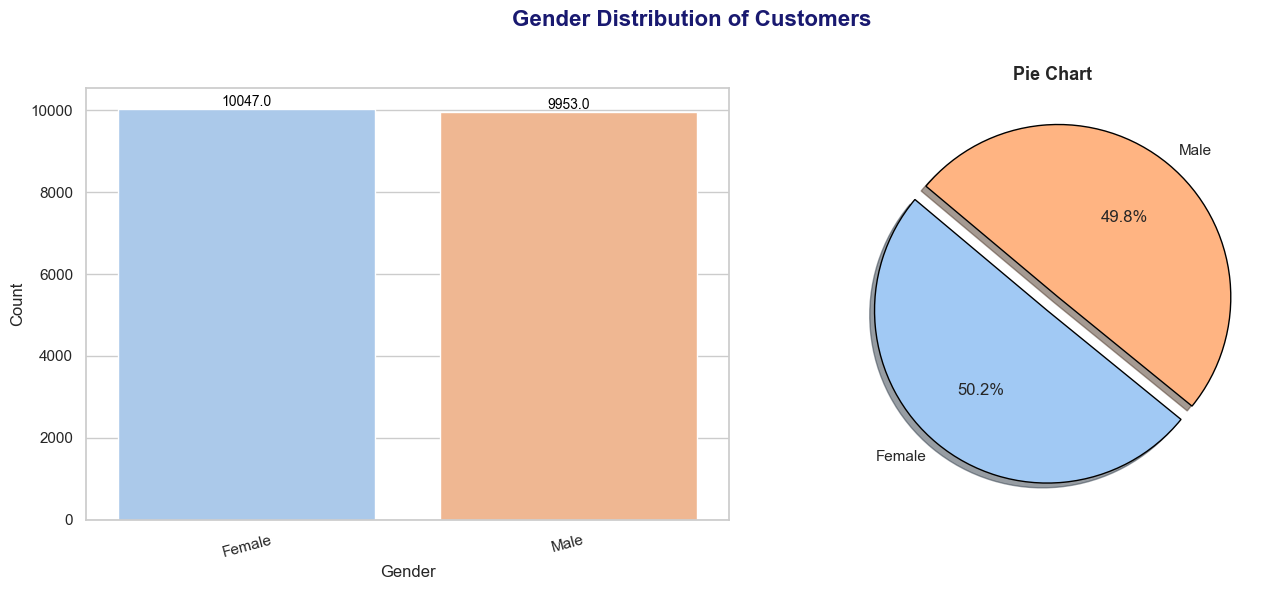

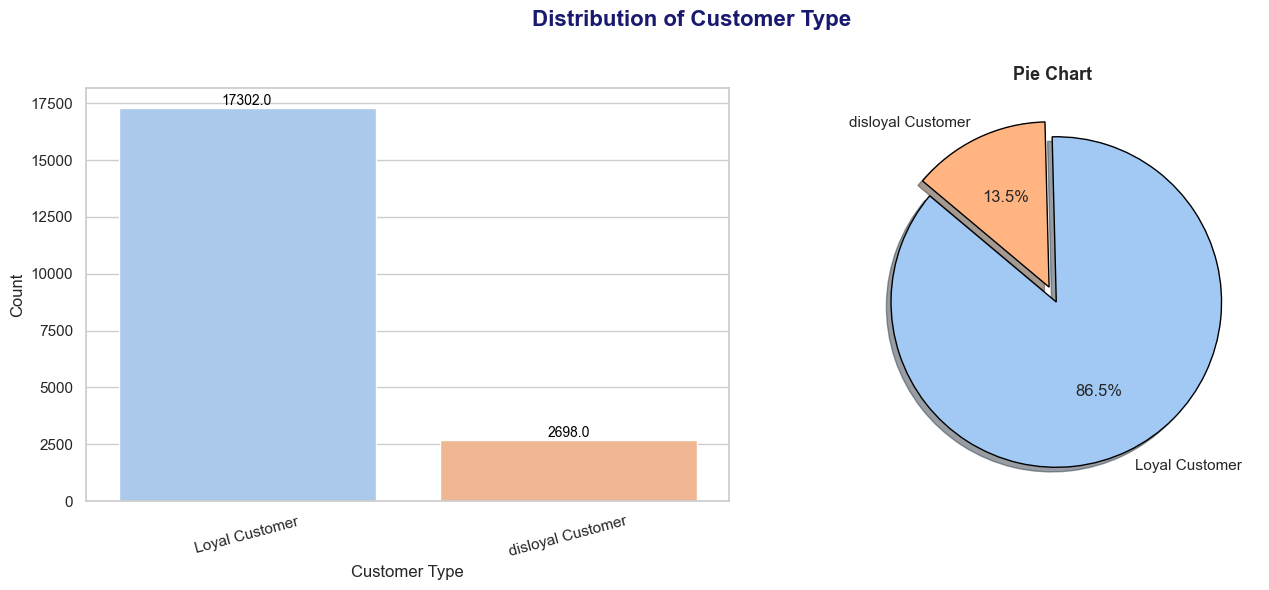

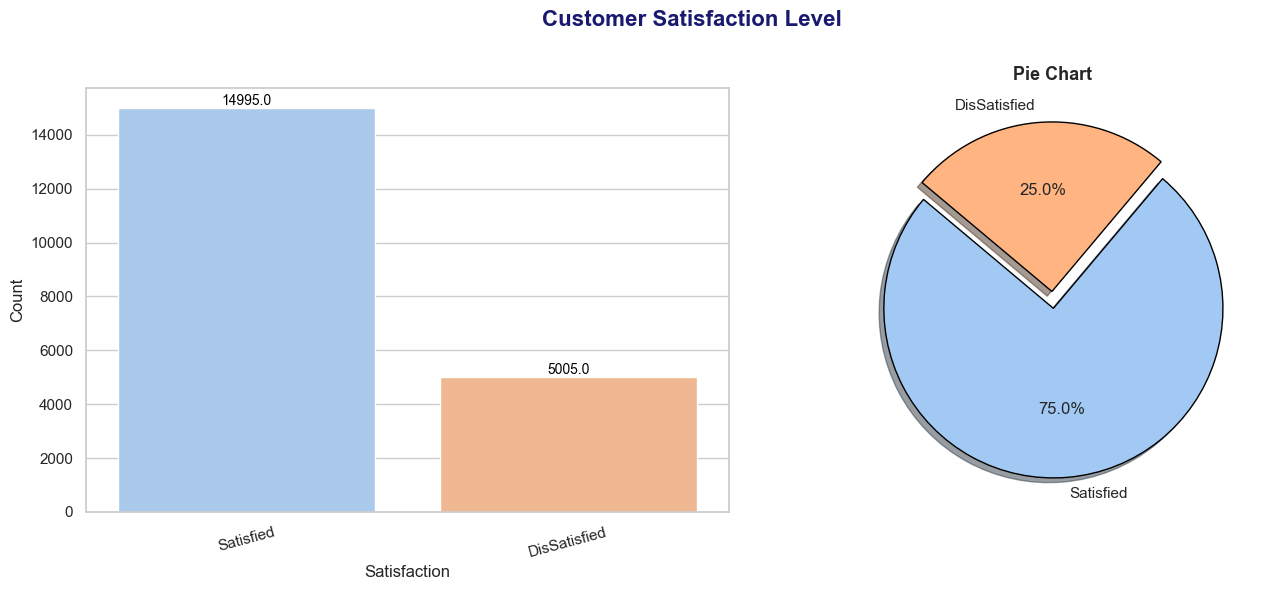

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style
sns.set(style="whitegrid", context='notebook')

# Define a function to annotate bars
def annotate_bars(ax):
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height}', 
                    (p.get_x() + p.get_width() / 2., height), 
                    ha='center', va='bottom', fontsize=10, color='black')

# Custom color palette
custom_palette = sns.color_palette("pastel")

# Categories to visualize
columns = ['Gender', 'Customer Type', 'Satisfaction']
titles = [
    "Gender Distribution of Customers",
    "Distribution of Customer Type",
    "Customer Satisfaction Level"
]

# Loop through each categorical column
for col, title in zip(columns, titles):
    # Calculate value counts
    counts = dataset[col].value_counts()
    labels = counts.index
    values = counts.values
    proportions = values / values.sum()

    # Create subplots
    fig, axs = plt.subplots(1, 2, figsize=(14, 6))
    fig.suptitle(title, fontsize=16, fontweight='bold', color='midnightblue')

    # Bar plot
    ax_bar = sns.countplot(data=dataset, x=col, palette=custom_palette, ax=axs[0])
    annotate_bars(ax_bar)
    axs[0].set_xlabel(col, fontsize=12)
    axs[0].set_ylabel("Count", fontsize=12)
    axs[0].tick_params(axis='x', labelrotation=15)

    # Pie chart
    axs[1].pie(
        values,
        labels=labels,
        autopct='%1.1f%%',
        startangle=140,
        colors=custom_palette,
        shadow=True,
        explode=[0.05]*len(values),
        wedgeprops={'edgecolor': 'black'}
    )
    axs[1].set_title("Pie Chart", fontsize=13, fontweight='bold')

    plt.tight_layout()
    plt.subplots_adjust(top=0.85)
    plt.show()


#### Step 4: Numerical Data Analysis

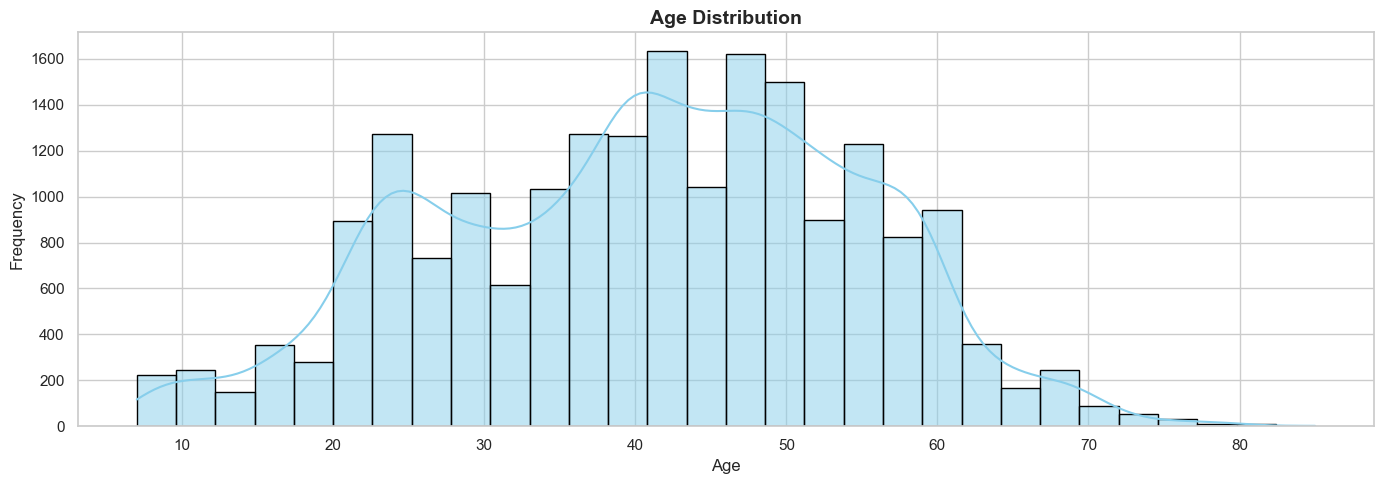

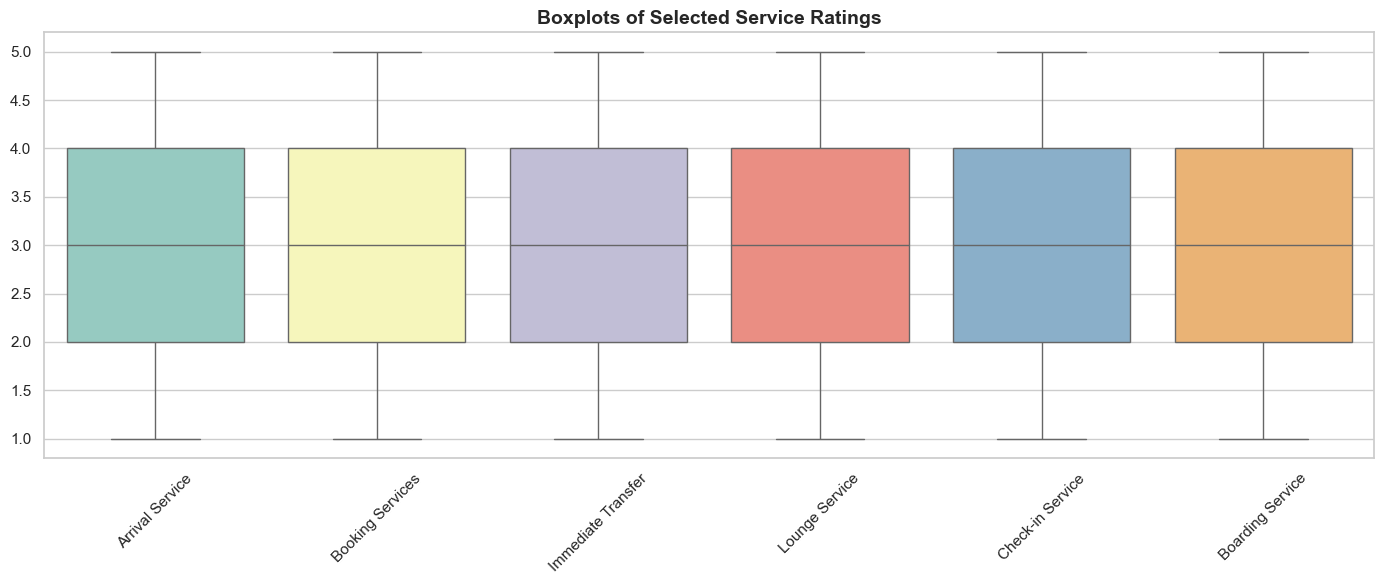

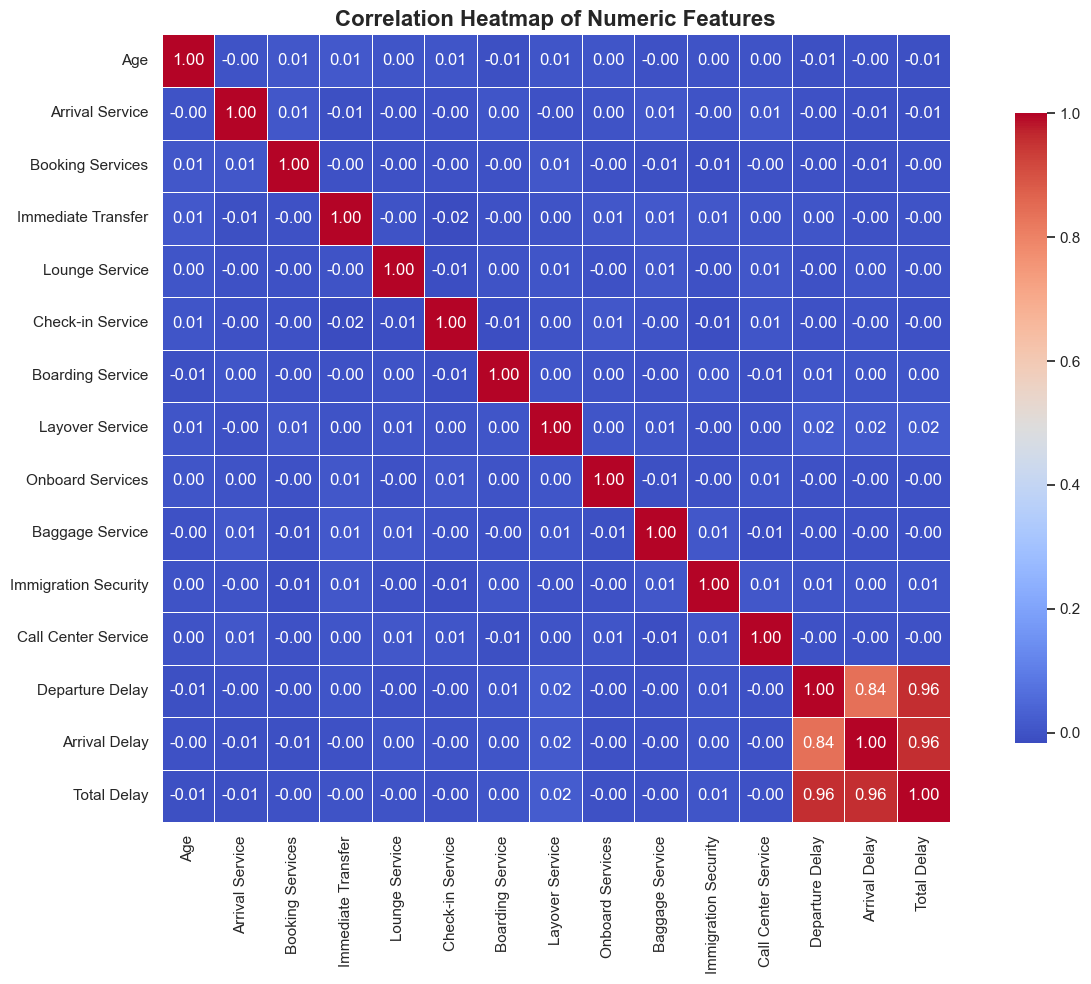

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style
sns.set(style="whitegrid", context='notebook')

# Select only numerical columns (excluding 'Customer ID' if it's an identifier)
numeric_cols = dataset.select_dtypes(include='number').drop(columns=['Customer ID'])

# 1. Distribution of 'Age'
plt.figure(figsize=(14, 5))
sns.histplot(dataset['Age'], kde=True, color='skyblue', bins=30, edgecolor='black')
plt.title("Age Distribution", fontsize=14, fontweight='bold')
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# 2. Boxplots for service ratings (selecting a few representative columns)
service_columns = [
    'Arrival Service', 'Booking Services', 'Immediate Transfer', 
    'Lounge Service', 'Check-in Service', 'Boarding Service'
]

plt.figure(figsize=(14, 6))
sns.boxplot(data=dataset[service_columns], palette='Set3')
plt.title("Boxplots of Selected Service Ratings", fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3. Correlation Heatmap
plt.figure(figsize=(14, 10))
corr_matrix = numeric_cols.corr()

sns.heatmap(
    corr_matrix, 
    annot=True, 
    cmap='coolwarm', 
    fmt='.2f', 
    linewidths=0.5, 
    cbar_kws={"shrink": 0.8},
    square=True
)
plt.title("Correlation Heatmap of Numeric Features", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()


In [93]:
dataset.head()

,Customer ID,Gender,Customer Type,Age,Type of Travel,Class,Arrival Service,Booking Services,Immediate Transfer,Lounge Service,...,Boarding Service,Layover Service,Onboard Services,Baggage Service,Immigration Security,Call Center Service,Departure Delay,Arrival Delay,Total Delay,Satisfaction
0,29431,Female,Loyal Customer,59,Business travel,Business,4,2,2,1,...,2,5,2,5,5,3,0,0.0,0.0,Satisfied
1,89591,Female,Loyal Customer,46,Business travel,Business,5,1,3,3,...,1,3,3,5,4,1,23,3.0,26.0,Satisfied
2,67145,Male,Loyal Customer,45,Business travel,Eco,3,1,1,4,...,3,3,3,5,2,5,0,0.0,0.0,Satisfied
3,112858,Female,Loyal Customer,40,Business travel,Business,5,1,2,5,...,4,2,2,4,5,5,0,0.0,0.0,Satisfied
4,72843,Male,Loyal Customer,54,Business travel,Business,5,3,1,5,...,4,5,1,2,5,2,0,0.0,0.0,Satisfied


#### Step 5: Relationship Between Variables

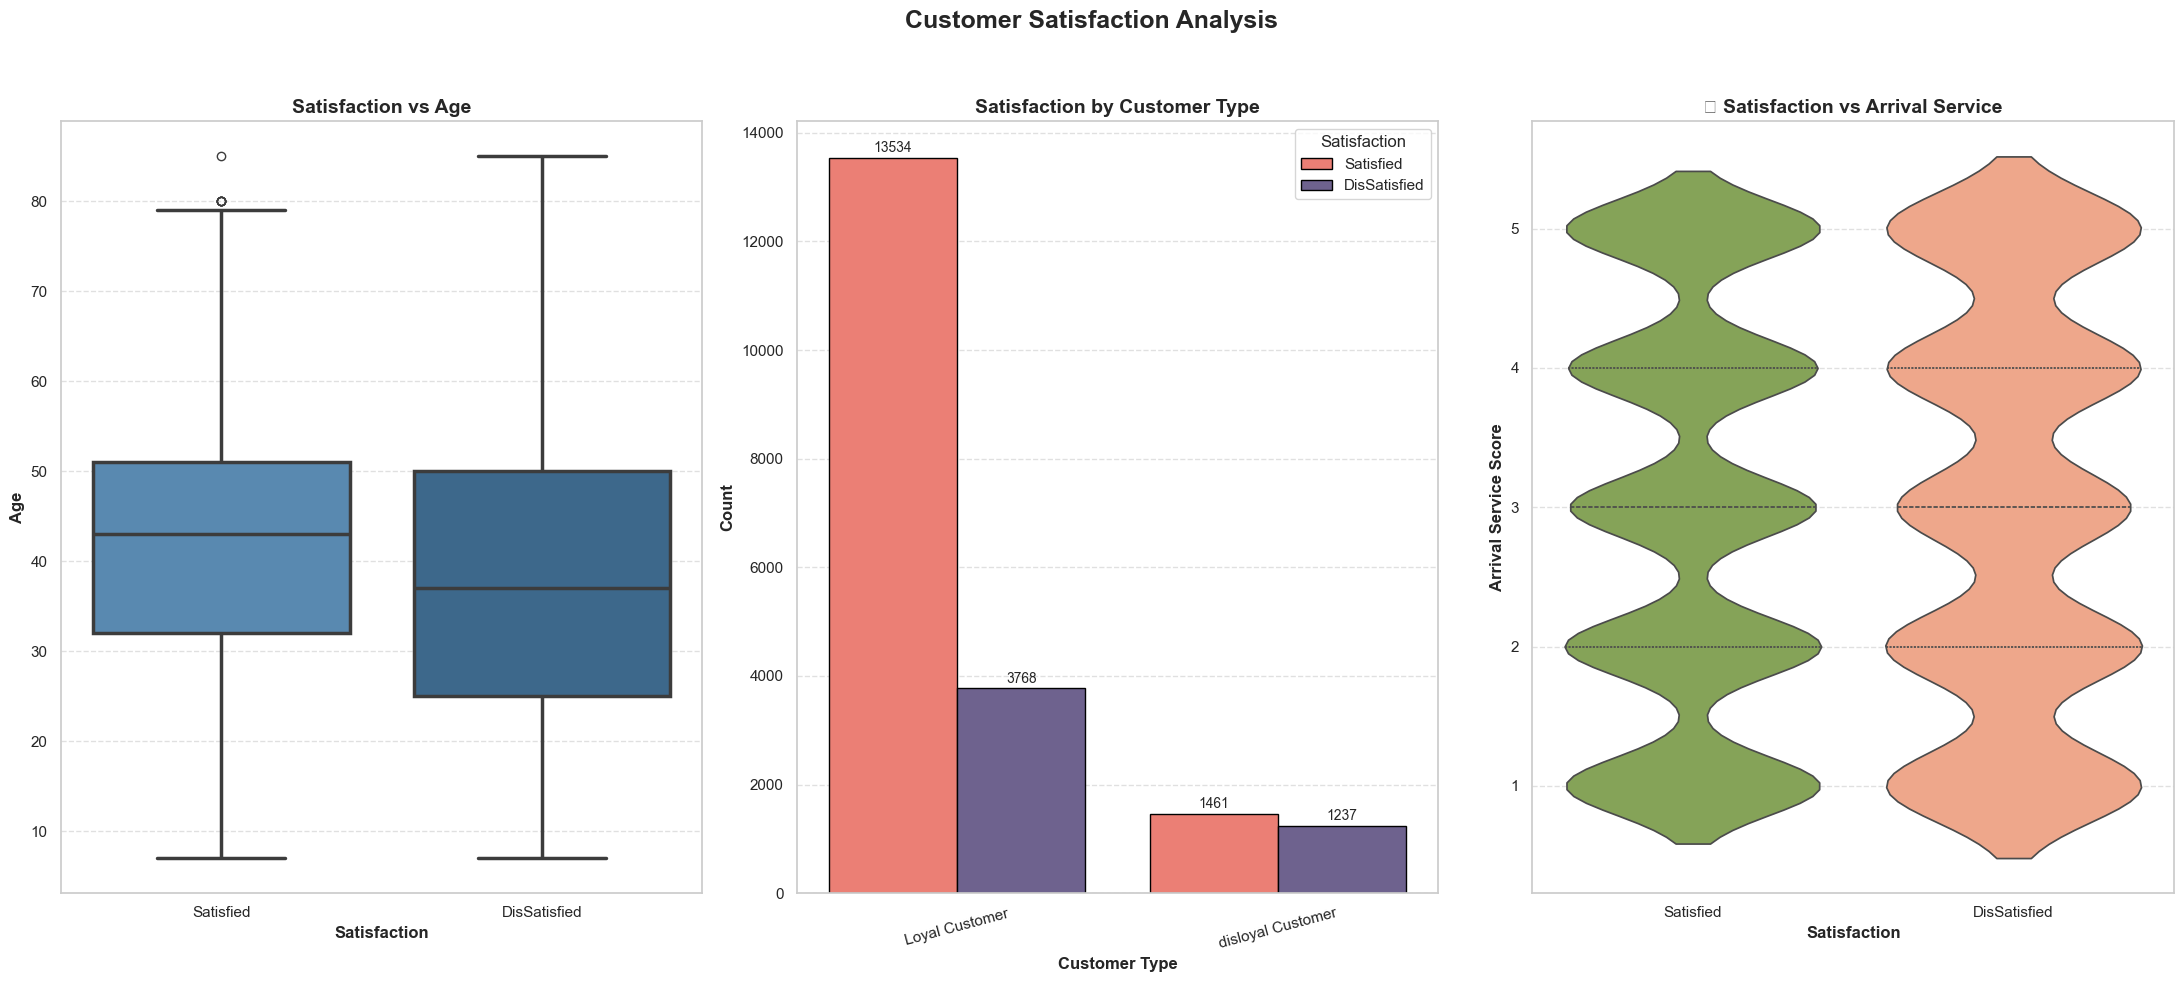

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style
sns.set(style="whitegrid", context='notebook')

# Custom color palettes
box_palette = ['#4B8BBE', '#306998']           # Blue shades for boxplot
count_palette = ['#FF6F61', '#6B5B95']         # Red and purple for satisfaction categories
violin_palette = ['#88B04B', '#FFA07A']        # Green and salmon for violin plot

# Create the subplot layout
fig, axes = plt.subplots(1, 3, figsize=(22, 10))
fig.suptitle("Customer Satisfaction Analysis", fontsize=18, fontweight='bold')

# Plot 1: Boxplot - Satisfaction vs Age
sns.boxplot(data=dataset, x='Satisfaction', y='Age', palette=box_palette, linewidth=2.5, ax=axes[0])
axes[0].set_title("Satisfaction vs Age", fontsize=14, fontweight='bold')
axes[0].set_xlabel("Satisfaction", fontsize=12, weight='bold')
axes[0].set_ylabel("Age", fontsize=12, weight='bold')
axes[0].grid(axis='y', linestyle='--', alpha=0.6)

# Plot 2: Countplot - Satisfaction by Customer Type
ax2 = sns.countplot(data=dataset, x='Customer Type', hue='Satisfaction', palette=count_palette, edgecolor='black', ax=axes[1])
axes[1].set_title("Satisfaction by Customer Type", fontsize=14, fontweight='bold')
axes[1].set_xlabel("Customer Type", fontsize=12, weight='bold')
axes[1].set_ylabel("Count", fontsize=12, weight='bold')
axes[1].grid(axis='y', linestyle='--', alpha=0.6)
axes[1].legend(title='Satisfaction', loc='upper right')
axes[1].tick_params(axis='x', rotation=15)

# Annotate values on bars
for container in ax2.containers:
    ax2.bar_label(container, fmt='%d', label_type='edge', fontsize=10, padding=2)

# Plot 3: Violin Plot - Satisfaction vs Arrival Service
sns.violinplot(data=dataset, x='Satisfaction', y='Arrival Service', palette=violin_palette, inner='quartile', ax=axes[2])
axes[2].set_title("🎻 Satisfaction vs Arrival Service", fontsize=14, fontweight='bold')
axes[2].set_xlabel("Satisfaction", fontsize=12, weight='bold')
axes[2].set_ylabel("Arrival Service Score", fontsize=12, weight='bold')
axes[2].grid(axis='y', linestyle='--', alpha=0.6)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

#### Step 6: Grouped Analysis

In [96]:
# Grouping by Satisfaction and summarizing numerical columns
grouped_data = dataset.groupby('Satisfaction').agg({
    'Age': ['mean', 'std', 'min', 'max'],
    'Arrival Service': ['mean', 'std', 'min', 'max'],
    'Booking Services': ['mean', 'std', 'min', 'max'],
    # Add other columns as necessary
})
print(grouped_data)


                    Age                    Arrival Service                    \
                   mean        std min max            mean       std min max   
Satisfaction                                                                   
DisSatisfied  37.900899  16.423884   7  85        2.997003  1.425821   1   5   
Satisfied     41.754985  12.750088   7  85        2.994732  1.419405   1   5   

             Booking Services                    
                         mean       std min max  
Satisfaction                                     
DisSatisfied         3.031369  1.407562   1   5  
Satisfied            3.024208  1.416763   1   5  


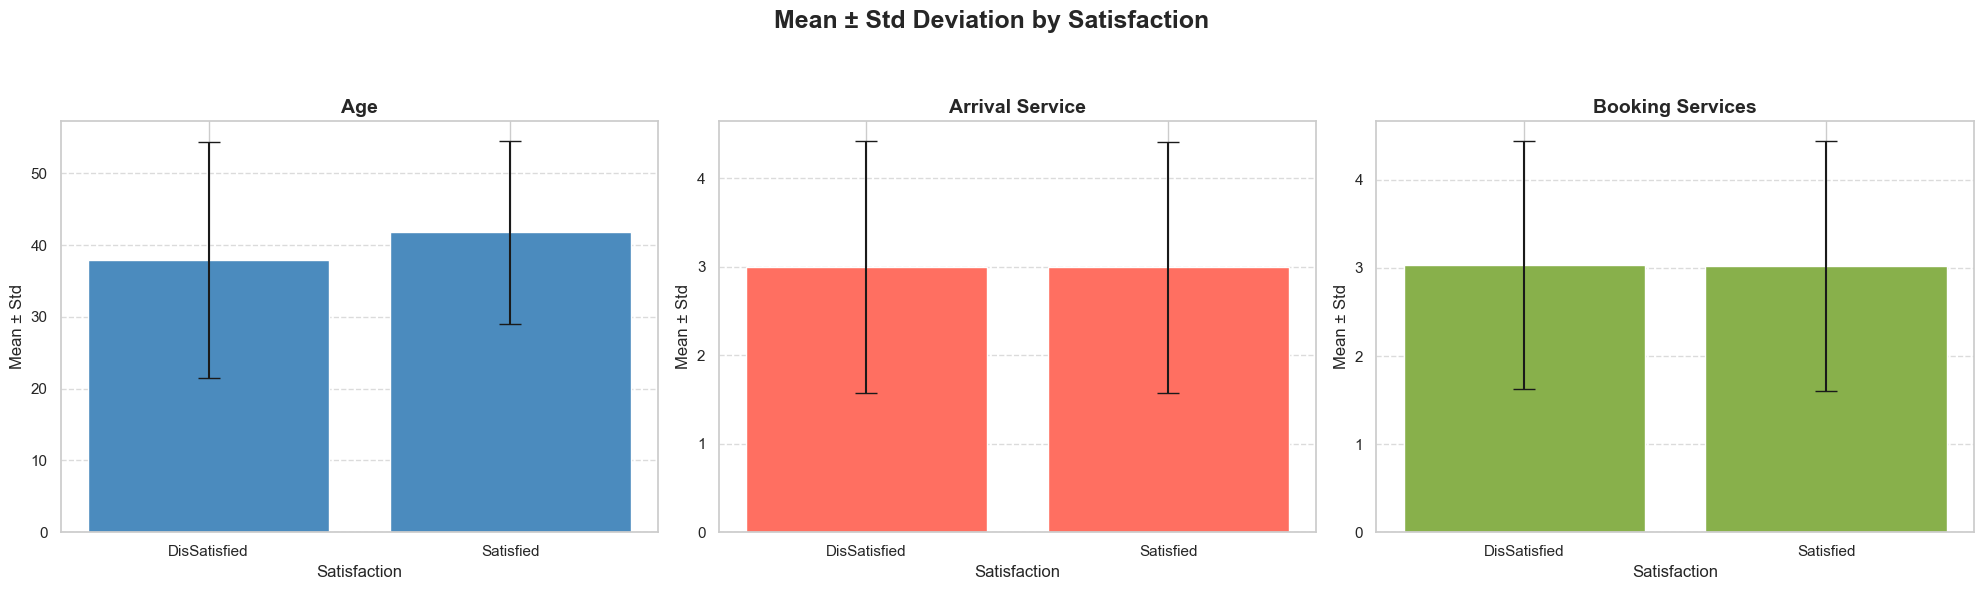

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Grouping and summarizing
grouped_data = dataset.groupby('Satisfaction').agg({
    'Age': ['mean', 'std'],
    'Arrival Service': ['mean', 'std'],
    'Booking Services': ['mean', 'std']
})

# Flatten MultiIndex columns
grouped_data.columns = ['_'.join(col) for col in grouped_data.columns]
grouped_data = grouped_data.reset_index()

# Set Seaborn style
sns.set(style="whitegrid")

# Define color palette
colors = ['#4B8BBE', '#FF6F61', '#88B04B']

# Create subplot layout
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle("Mean ± Std Deviation by Satisfaction", fontsize=18, fontweight='bold')

# Plot 1: Age
axes[0].bar(grouped_data['Satisfaction'], grouped_data['Age_mean'], 
            yerr=grouped_data['Age_std'], capsize=8, color=colors[0])
axes[0].set_title("Age", fontsize=14, weight='bold')
axes[0].set_ylabel("Mean ± Std", fontsize=12)

# Plot 2: Arrival Service
axes[1].bar(grouped_data['Satisfaction'], grouped_data['Arrival Service_mean'], 
            yerr=grouped_data['Arrival Service_std'], capsize=8, color=colors[1])
axes[1].set_title("Arrival Service", fontsize=14, weight='bold')
axes[1].set_ylabel("Mean ± Std", fontsize=12)

# Plot 3: Booking Services
axes[2].bar(grouped_data['Satisfaction'], grouped_data['Booking Services_mean'], 
            yerr=grouped_data['Booking Services_std'], capsize=8, color=colors[2])
axes[2].set_title("Booking Services", fontsize=14, weight='bold')
axes[2].set_ylabel("Mean ± Std", fontsize=12)

# Shared formatting
for ax in axes:
    ax.set_xlabel("Satisfaction", fontsize=12)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.show()


#### Step 8: Checking for Outliers

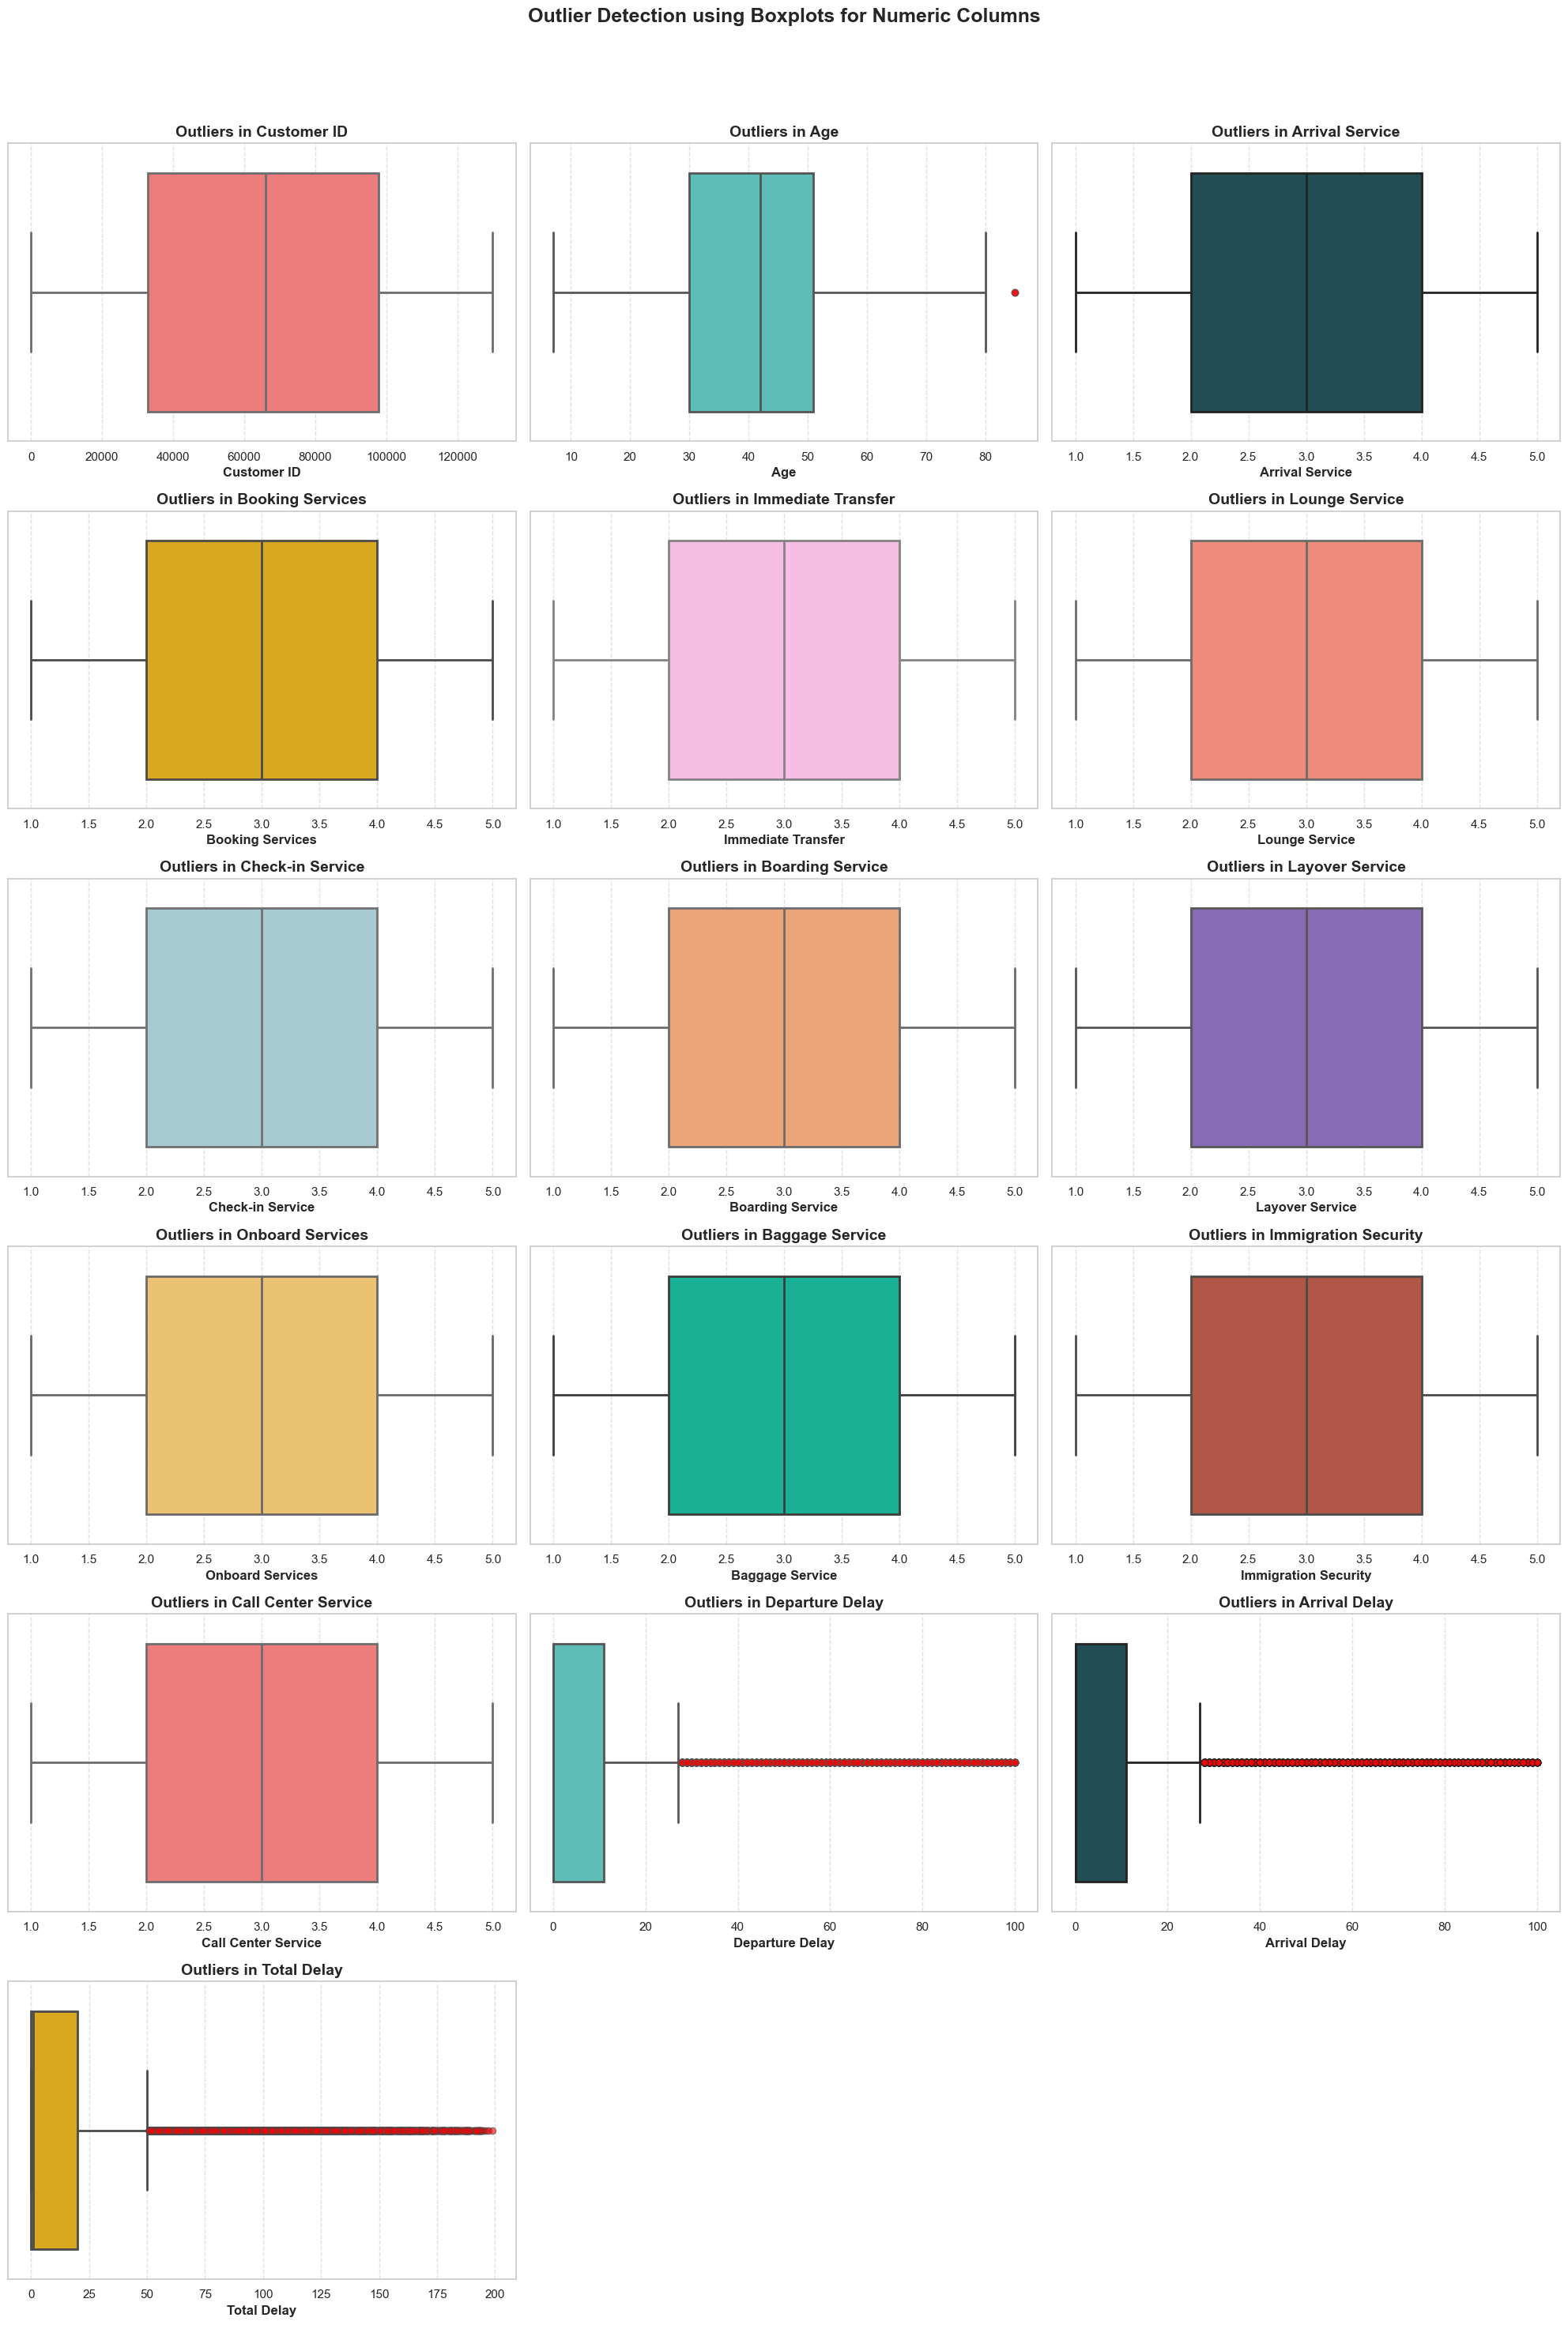

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style
sns.set(style="whitegrid", context='notebook')

# Define flier (outlier) properties
flier_props = dict(marker='o', markerfacecolor='red', markersize=6, linestyle='none', alpha=0.6)

# Select only numeric columns from the dataset
numeric_columns = dataset.select_dtypes(include=['float64', 'int64']).columns

# Define a custom color palette
custom_colors = ['#FF6B6B', '#4ECDC4', '#1A535C', '#F7B801', '#FFB5E8', '#FF7E67', 
                 '#A0CED9', '#FF9F68', '#845EC2', '#FFC75F', '#00C9A7', '#C34A36']

# Set the number of rows and columns for subplots
n_cols = 3
n_rows = (len(numeric_columns) // n_cols) + 1

# Set figure size and layout
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows))
fig.suptitle("Outlier Detection using Boxplots for Numeric Columns", fontsize=18, fontweight='bold')

# Flatten axes array for easy iteration
axes = axes.flatten()

# Loop through numeric columns and create boxplots
for i, column in enumerate(numeric_columns):
    color = custom_colors[i % len(custom_colors)]  # Cycle through custom colors
    sns.boxplot(data=dataset, x=column, color=color, flierprops=flier_props, linewidth=2, ax=axes[i])
    axes[i].set_title(f"Outliers in {column}", fontsize=14, fontweight='bold')
    axes[i].set_xlabel(column, fontsize=12, weight='bold')
    axes[i].grid(axis='x', linestyle='--', alpha=0.6)

# Remove empty axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

#### Step 9: Feature Engineering

In [99]:
# Example: Create a new feature for total delay
dataset['Total Delay'] = dataset['Departure Delay'] + dataset['Arrival Delay']

# Check the new feature
dataset[['Customer ID', 'Total Delay']].head()


,Customer ID,Total Delay
0,29431,0.0
1,89591,26.0
2,67145,0.0
3,112858,0.0
4,72843,0.0


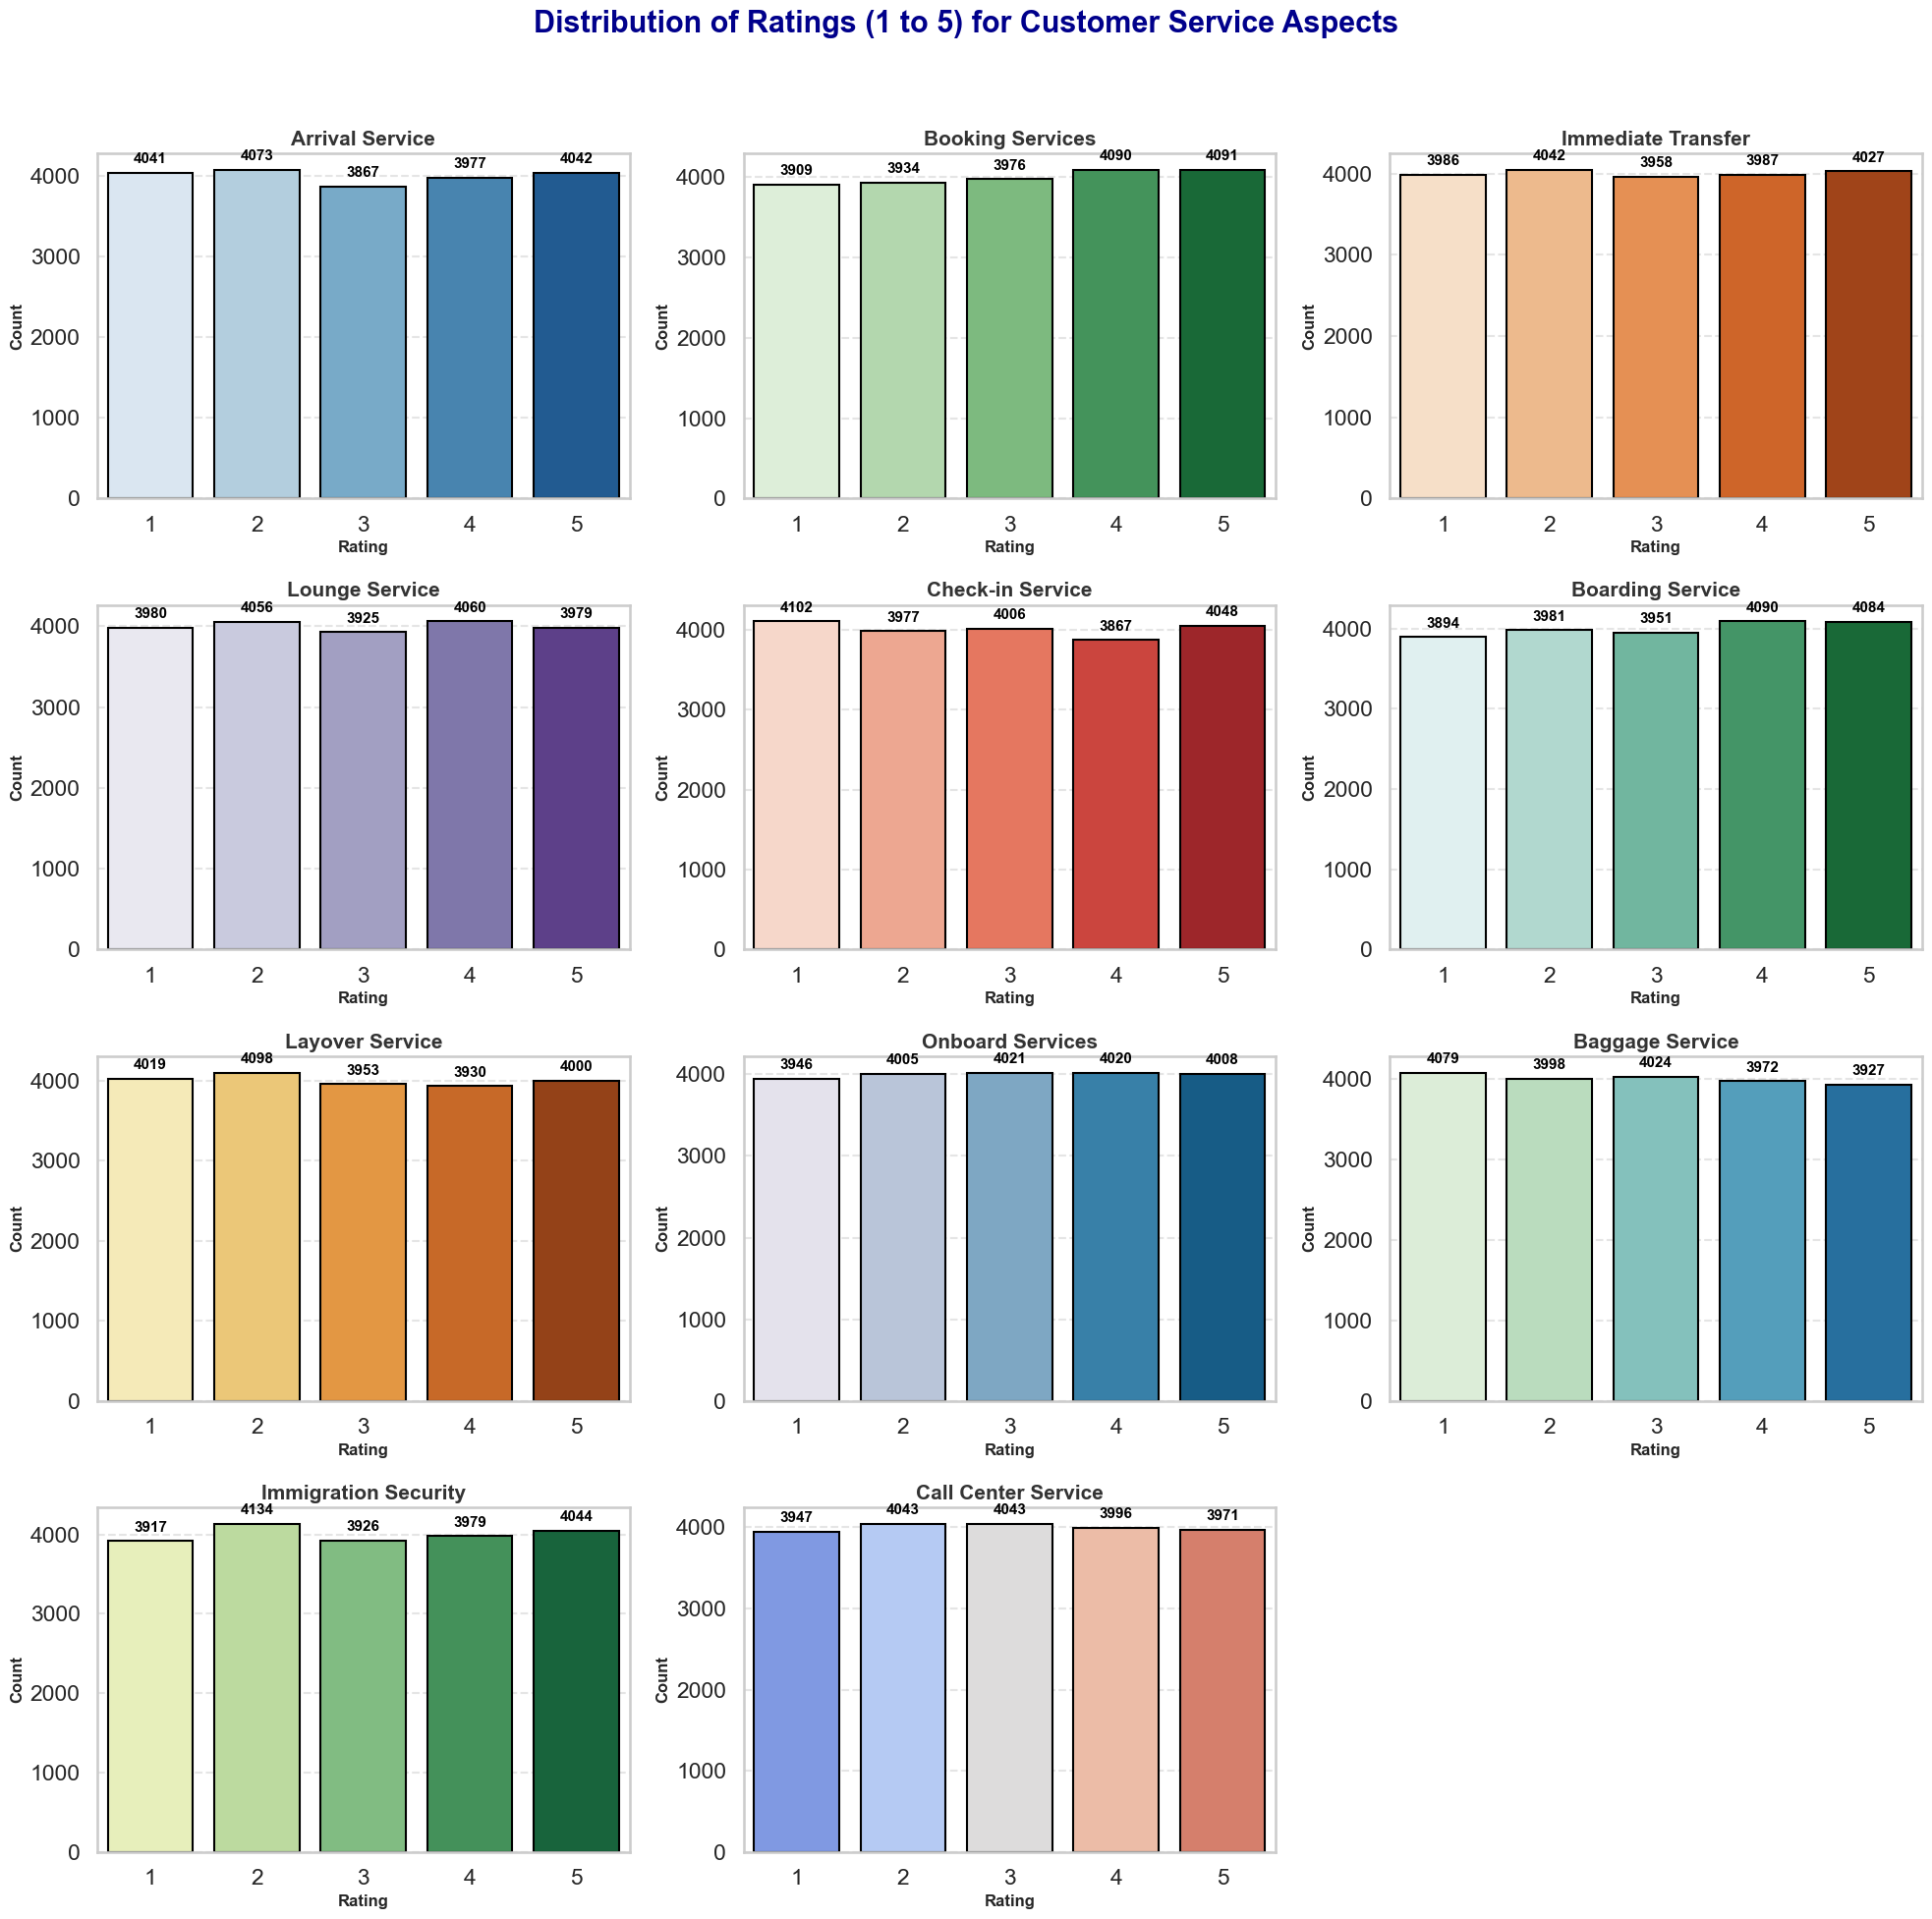

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style and context
sns.set(style="whitegrid", context='talk')

# List of service columns
service_columns = [
    'Arrival Service', 'Booking Services', 'Immediate Transfer', 'Lounge Service',
    'Check-in Service', 'Boarding Service', 'Layover Service', 'Onboard Services',
    'Baggage Service', 'Immigration Security', 'Call Center Service'
]

# Define unique color palettes to rotate
palettes = [
    "Blues", "Greens", "Oranges", "Purples", "Reds", 
    "BuGn", "YlOrBr", "PuBu", "GnBu", "YlGn", "coolwarm"
]

# Set subplot layout
n_cols = 3
n_rows = (len(service_columns) // n_cols) + 1
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows))
fig.suptitle("Distribution of Ratings (1 to 5) for Customer Service Aspects", 
             fontsize=22, fontweight='bold', color='darkblue')

# Flatten axes for iteration
axes = axes.flatten()

# Create bar plots with unique palettes
for i, col in enumerate(service_columns):
    value_counts = dataset[col].value_counts().sort_index()
    sns.barplot(x=value_counts.index, y=value_counts.values, palette=palettes[i % len(palettes)], 
                ax=axes[i], edgecolor="black")
    
    axes[i].set_title(f"{col}", fontsize=15, fontweight='bold', color='#333333')
    axes[i].set_xlabel("Rating", fontsize=12, weight='bold')
    axes[i].set_ylabel("Count", fontsize=12, weight='bold')
    axes[i].grid(axis='y', linestyle='--', alpha=0.5)
    
    for j, val in enumerate(value_counts.values):
        axes[i].text(j, val + max(value_counts.values)*0.02, str(val), ha='center', va='bottom',
                     fontsize=11, color='black', fontweight='bold')

# Remove unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Layout adjustment
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


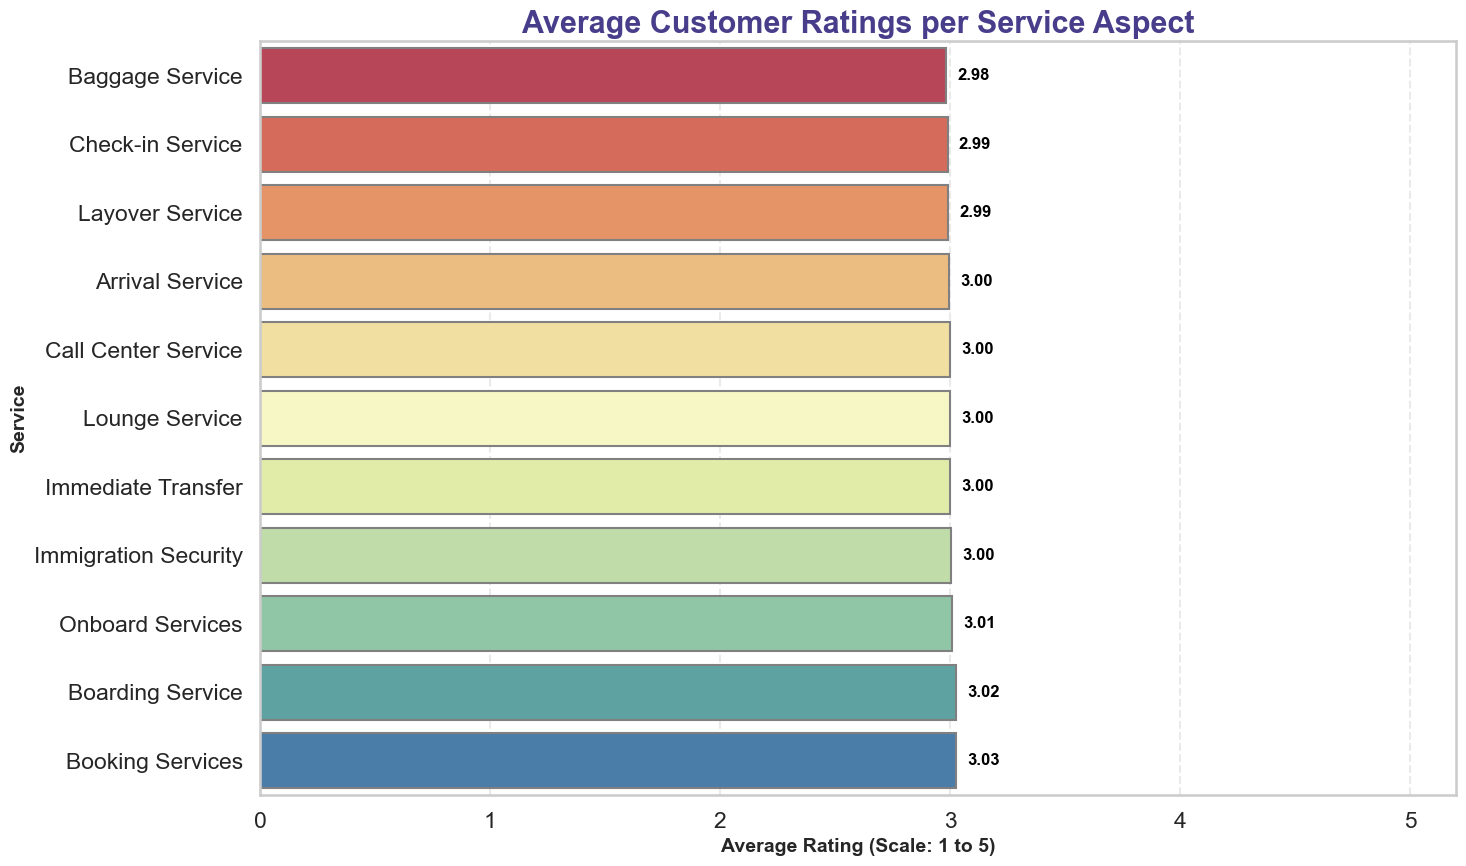

In [107]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style
sns.set(style="whitegrid", context='talk')

# Service columns
service_columns = [
    'Arrival Service', 'Booking Services', 'Immediate Transfer', 'Lounge Service',
    'Check-in Service', 'Boarding Service', 'Layover Service', 'Onboard Services',
    'Baggage Service', 'Immigration Security', 'Call Center Service'
]

# Compute average ratings
average_ratings = dataset[service_columns].mean().sort_values(ascending=True)  # bottom-up for aesthetics

# Plot settings
plt.figure(figsize=(15, 9))
bar_colors = sns.color_palette("Spectral", len(average_ratings))

# Horizontal barplot
bars = sns.barplot(x=average_ratings.values, y=average_ratings.index, palette=bar_colors, linewidth=1.5, edgecolor='gray')

# Plot title and labels
plt.title("Average Customer Ratings per Service Aspect", fontsize=22, fontweight='bold', color='darkslateblue')
plt.xlabel("Average Rating (Scale: 1 to 5)", fontsize=14, weight='bold')
plt.ylabel("Service", fontsize=14, weight='bold')
plt.xlim(0, 5.2)

# Add rating labels on bars
for i, (value, name) in enumerate(zip(average_ratings.values, average_ratings.index)):
    plt.text(value + 0.05, i, f"{value:.2f}", va='center', fontsize=12, fontweight='bold', color='black')

# Light grid and layout
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()